In [35]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from functools import reduce
import seaborn as sns

In [36]:
przestepstwa = pd.read_csv("Przestepstwa_pow.csv")
pow = pd.read_csv("Przestepstwa_pow.csv")
bezrobotni = pd.read_csv("Bezrobotni.csv")
ceny = pd.read_csv("Ceny_mieszkan.csv")
dochody = pd.read_csv("Dochody_na_mieszkanca.csv")
wynagrodzenie = pd.read_csv("Przecietne_wynagrodzenie.csv")
rozwody = pd.read_csv("Rozwody_i_separacje.csv")
ludnosc = pd.read_csv("Ludnosc.csv")
pow_map = "powiaty.shp"
#pow_m = gpd.read_file(pow_map)

In [37]:
list = [przestepstwa, bezrobotni, ceny, dochody, wynagrodzenie, rozwody]

for i in list:
    i.drop(['oid', 'kod KTS', 'powierzchnia', 'rok', 'TERYT', 'Typ powiatu', 'TERYT województwa'], axis=1, inplace=True)

In [38]:
przestepstwa.rename(columns={
    'Przestępstwa stwierdzone przez Policję w zakończonych postępowaniach przygotowawczych|ogółem' : 'Przestepstwa'
}, inplace=True)
bezrobotni.rename(columns={
    'Bezrobotni zarejestrowani pozostający bez pracy dłużej niż 1 rok|ogółem' : 'Bezrobotni'
}, inplace=True)
ceny.rename(columns={
    'Średnia cena lokali mieszkalnych sprzedanych w ramach transakcji rynkowych|ogółem|ogółem' : 'Ceny mieszkan'
}, inplace=True)
dochody.rename(columns={
    'Dochody na 1 mieszkańca|gminy łącznie z miastami na prawach powiatu|ogółem' : 'Dochody na mieszkanca'
}, inplace=True)
wynagrodzenie.rename(columns={
    'Przeciętne miesięczne wynagrodzenia brutto|ogółem' : 'Wynagrodzenie'
}, inplace=True)
rozwody.rename(columns={
    'Rozwody i separacje|rozwody|ogółem' : 'Rozwody i separacje'
}, inplace=True)

In [39]:
ludnosc.columns = ludnosc.columns.str.strip()

ludnosc = pd.DataFrame({
    'powiat': ludnosc['Powiaty'],
    'Ludnosc_powiaty': ludnosc['Ludnosc']
})

print(ludnosc)

                powiat  Ludnosc_powiaty
0        bolesławiecki            90103
1       dzierżoniowski           100813
2            głogowski            89102
3             górowski            34870
4             jaworski            50116
..                 ...              ...
375         świdwiński            46724
376            wałecki            53039
377           Koszalin           107048
378           Szczecin           401907
379        Świnoujście            40888

[380 rows x 2 columns]


In [40]:
przestepstwa.head()

,powiat,Województwo,Przestepstwa
0,nowosądecki,małopolskie,11958.0
1,tarnowski,małopolskie,2860.0
2,gorzowski,lubuskie,1108.0
3,koniński,wielkopolskie,1163.0
4,poznański,wielkopolskie,5260.0


In [41]:
przestepstwa['powiat'] = przestepstwa['powiat'].str.strip()
ludnosc['powiat'] = ludnosc['powiat'].str.strip()

In [42]:
przestepstwa_merge = przestepstwa.merge(ludnosc, on='powiat')

In [43]:
przestepstwa_merge['Przestepstwa_średnia_powiaty'] = (przestepstwa_merge['Przestepstwa']/przestepstwa_merge['Ludnosc_powiaty'])

In [44]:
print(przestepstwa_merge[['powiat', 'Przestepstwa_średnia_powiaty']])

           powiat  Przestepstwa_średnia_powiaty
0     nowosądecki                      0.055158
1       tarnowski                      0.014194
2       gorzowski                      0.015424
3        koniński                      0.008943
4       poznański                      0.013174
..            ...                           ...
395     siedlecki                      0.009415
396    sokołowski                      0.017081
397     węgrowski                      0.012260
398  sochaczewski                      0.016685
399   żyrardowski                      0.021162

[400 rows x 2 columns]


In [45]:
bezrobotni.head()

,powiat,Województwo,Bezrobotni
0,nowosądecki,małopolskie,3256.0
1,tarnowski,małopolskie,2009.0
2,gorzowski,lubuskie,402.0
3,koniński,wielkopolskie,1928.0
4,poznański,wielkopolskie,913.0


In [46]:
bezrobotni['powiat'] = bezrobotni['powiat'].str.strip()
ludnosc['powiat'] = ludnosc['powiat'].str.strip()

In [47]:
bezrobotni_merge = bezrobotni.merge(ludnosc, on='powiat')

In [48]:
bezrobotni_merge['Bezrobotni_średnia_powiaty'] = (bezrobotni_merge['Bezrobotni']/bezrobotni_merge['Ludnosc_powiaty'])

In [49]:
print(bezrobotni_merge[['powiat', 'Bezrobotni_średnia_powiaty']])

           powiat  Bezrobotni_średnia_powiaty
0     nowosądecki                    0.015019
1       tarnowski                    0.009970
2       gorzowski                    0.005596
3        koniński                    0.014825
4       poznański                    0.002287
..            ...                         ...
395     siedlecki                    0.007190
396    sokołowski                    0.010613
397     węgrowski                    0.011987
398  sochaczewski                    0.006173
399   żyrardowski                    0.020462

[400 rows x 2 columns]


In [50]:
rozwody.head()

,powiat,Województwo,Rozwody i separacje
0,nowosądecki,małopolskie,139.0
1,tarnowski,małopolskie,175.0
2,gorzowski,lubuskie,72.0
3,koniński,wielkopolskie,142.0
4,poznański,wielkopolskie,427.0


In [51]:
rozwody['powiat'] = rozwody['powiat'].str.strip()

In [52]:
rozwody_merge = rozwody.merge(ludnosc, on='powiat')

In [53]:
rozwody_merge['Rozwody_średnia_powiaty'] = (rozwody_merge['Rozwody i separacje']/rozwody_merge['Ludnosc_powiaty'])

In [54]:
print(rozwody_merge[['powiat', 'Rozwody_średnia_powiaty']])

           powiat  Rozwody_średnia_powiaty
0     nowosądecki                 0.000641
1       tarnowski                 0.000868
2       gorzowski                 0.001002
3        koniński                 0.001092
4       poznański                 0.001069
..            ...                      ...
395     siedlecki                 0.001020
396    sokołowski                 0.000911
397     węgrowski                 0.000912
398  sochaczewski                 0.001329
399   żyrardowski                 0.001294

[400 rows x 2 columns]


In [55]:
files_to_merge = [przestepstwa_merge, bezrobotni_merge, ceny, dochody, wynagrodzenie, rozwody_merge]

stats =['powiat', 'Województwo']

merged = reduce(lambda left, right: left.merge(right, on=stats, how='inner'), files_to_merge)
merged.drop(['Przestepstwa', 'Ludnosc_powiaty_x', 'Bezrobotni', 'Ludnosc_powiaty_y', 'Rozwody i separacje', 'Ludnosc_powiaty'], axis=1, inplace=True)

merged.to_csv("merged_output.csv", index=False)

print(merged)

           powiat    Województwo  Przestepstwa_średnia_powiaty  \
0     nowosądecki    małopolskie                      0.055158   
1       tarnowski    małopolskie                      0.014194   
2       gorzowski       lubuskie                      0.015424   
3        koniński  wielkopolskie                      0.008943   
4       poznański  wielkopolskie                      0.013174   
..            ...            ...                           ...   
515     siedlecki    mazowieckie                      0.009415   
516    sokołowski    mazowieckie                      0.017081   
517     węgrowski    mazowieckie                      0.012260   
518  sochaczewski    mazowieckie                      0.016685   
519   żyrardowski    mazowieckie                      0.021162   

     Bezrobotni_średnia_powiaty  Ceny mieszkan  Dochody na mieszkanca  \
0                      0.015019       242497.0                6290.69   
1                      0.009970       210957.0               

In [56]:
merged.columns

Index(['powiat', 'Województwo', 'Przestepstwa_średnia_powiaty',
       'Bezrobotni_średnia_powiaty', 'Ceny mieszkan', 'Dochody na mieszkanca',
       'Wynagrodzenie', 'Rozwody_średnia_powiaty'],
      dtype='object')

In [57]:
merged.head()

,powiat,Województwo,Przestepstwa_średnia_powiaty,Bezrobotni_średnia_powiaty,Ceny mieszkan,Dochody na mieszkanca,Wynagrodzenie,Rozwody_średnia_powiaty
0,nowosądecki,małopolskie,0.055158,0.015019,242497.0,6290.69,4160.76,0.000641
1,tarnowski,małopolskie,0.014194,0.009970,210957.0,5333.95,4149.11,0.000868
2,gorzowski,lubuskie,0.015424,0.005596,202519.0,5901.75,5012.81,0.001002
3,koniński,wielkopolskie,0.008943,0.014825,131116.0,5782.76,4184.77,0.001092
4,poznański,wielkopolskie,0.013174,0.002287,335041.0,6356.78,4776.27,0.001069


In [58]:
print(merged.isnull().sum())

powiat                          0
Województwo                     0
Przestepstwa_średnia_powiaty    0
Bezrobotni_średnia_powiaty      0
Ceny mieszkan                   1
Dochody na mieszkanca           0
Wynagrodzenie                   0
Rozwody_średnia_powiaty         0
dtype: int64


In [59]:
merged['Ceny mieszkan'].fillna(merged['Ceny mieszkan'].mean(), inplace=True)

C:\Users\xjulc\AppData\Local\Temp\ipykernel_77504\4029216478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged['Ceny mieszkan'].fillna(merged['Ceny mieszkan'].mean(), inplace=True)


In [60]:
print(merged.isnull().sum())

powiat                          0
Województwo                     0
Przestepstwa_średnia_powiaty    0
Bezrobotni_średnia_powiaty      0
Ceny mieszkan                   0
Dochody na mieszkanca           0
Wynagrodzenie                   0
Rozwody_średnia_powiaty         0
dtype: int64


In [61]:
merged

,powiat,Województwo,Przestepstwa_średnia_powiaty,Bezrobotni_średnia_powiaty,Ceny mieszkan,Dochody na mieszkanca,Wynagrodzenie,Rozwody_średnia_powiaty
0,nowosądecki,małopolskie,0.055158,0.015019,242497.0,6290.69,4160.76,0.000641
1,tarnowski,małopolskie,0.014194,0.009970,210957.0,5333.95,4149.11,0.000868
2,gorzowski,lubuskie,0.015424,0.005596,202519.0,5901.75,5012.81,0.001002
3,koniński,wielkopolskie,0.008943,0.014825,131116.0,5782.76,4184.77,0.001092
4,poznański,wielkopolskie,0.013174,0.002287,335041.0,6356.78,4776.27,0.001069
...,...,...,...,...,...,...,...,...
515,siedlecki,mazowieckie,0.009415,0.007190,361840.0,5748.01,4503.92,0.001020
516,sokołowski,mazowieckie,0.017081,0.010613,200539.0,5743.59,4792.94,0.000911
517,węgrowski,mazowieckie,0.012260,0.011987,166708.0,5942.15,4589.75,0.000912
518,sochaczewski,mazowieckie,0.016685,0.006173,197440.0,5911.03,5741.89,0.001329


In [62]:
X = merged[['Bezrobotni_średnia_powiaty', 'Ceny mieszkan', 'Dochody na mieszkanca',
       'Wynagrodzenie', 'Rozwody_średnia_powiaty']]
X = sm.add_constant(X)
y = merged['Przestepstwa_średnia_powiaty']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X['Ceny mieszkan'] = scaler.fit_transform(X[['Ceny mieszkan']])
X['Bezrobotni_średnia_powiaty'] = scaler.fit_transform(X[['Bezrobotni_średnia_powiaty']])
X['Dochody na mieszkanca'] = scaler.fit_transform(X[['Dochody na mieszkanca']])
X['Wynagrodzenie'] = scaler.fit_transform(X[['Wynagrodzenie']])
X['Rozwody_średnia_powiaty'] = scaler.fit_transform(X[['Rozwody_średnia_powiaty']])

model = sm.OLS(y, X).fit()
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Przestepstwa_średnia_powiaty   R-squared:                       0.151
Model:                                      OLS   Adj. R-squared:                  0.143
Method:                           Least Squares   F-statistic:                     18.34
Date:                          Wed, 11 Dec 2024   Prob (F-statistic):           8.99e-17
Time:                                  23:18:49   Log-Likelihood:                 1557.0
No. Observations:                           520   AIC:                            -3102.
Df Residuals:                               514   BIC:                            -3077.
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [ ]:
# Test CUSUM
from statsmodels.stats.diagnostic import breaks_cusumolsresid
c_stat,c_crit, c_p_value = breaks_cusumolsresid(model.resid)
print(f"Statystyka: {c_stat}, wartość krytyczna: {c_crit}, p-value: {c_p_value}")

AttributeError: 'LinearRegression' object has no attribute 'resid'

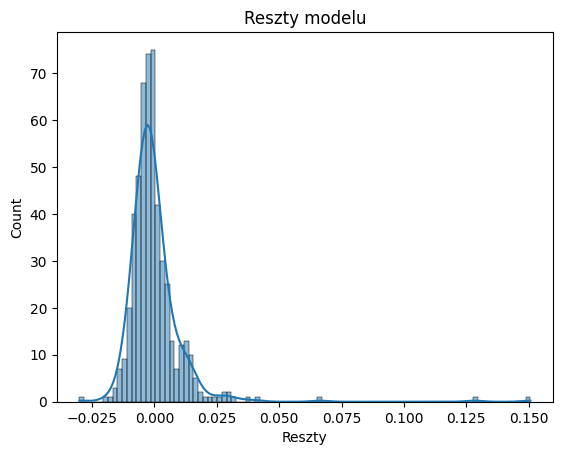

In [64]:
residuals = model.resid

sns.histplot(residuals, kde=True)
plt.title("Reszty modelu")
plt.xlabel("Reszty")
plt.show()


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


R2: 0.09619265033721058
MSE: 7.514167317723949e-05
                      Feature  Coefficient
0                       const     0.000000
1  Bezrobotni_średnia_powiaty    -0.001292
2               Ceny mieszkan    -0.002071
3       Dochody na mieszkanca     0.003270
4               Wynagrodzenie     0.001840
5     Rozwody_średnia_powiaty     0.003014


In [66]:
northern_counties = [
    'koszaliński', 'drawski', 'myśliborski', 'wałecki', 'Słupsk', 'Świnoujście', 
    'nowodworski', 'Gdańsk', 'Gdynia', 'Sopot', 'chojnicki', 'gołdapski', 
    'węgorzewski', 'Olsztyn', 'białogardzki', 'kołobrzeski', 'sławieński', 
    'Koszalin', 'choszczeński', 'pyrzycki', 'szczecinecki', 'świdwiński', 
    'łobeski', 'Szczecin', 'goleniowski', 'gryficki', 'gryfiński', 'kamieński', 
    'policki', 'stargardzki', 'gdański', 'kartuski', 'pucki', 'wejherowski', 
    'bytowski', 'lęborski', 'słupski', 'kwidzyński', 'malborski', 'starogardzki', 
    'tczewski', 'sztumski', 'człuchowski', 'kościerski', 'braniewski', 
    'działdowski', 'elbląski', 'iławski', 'nowomiejski', 'ostródzki', 'Elbląg', 
    'ełcki', 'giżycki', 'olecki', 'piski', 'bartoszycki', 'kętrzyński', 
    'lidzbarski', 'mrągowski', 'nidzicki', 'olsztyński', 'szczycieński'
]

southern_counties = [
    'nowosądecki', 'tarnowski', 'dzierżoniowski', 'ząbkowicki', 'Piekary Śląskie', 
    'nowotarski', 'krakowski', 'Tarnów', 'częstochowski', 'opolski', 'chrzanowski', 
    'Gliwice', 'Zabrze', 'Chorzów', 'Katowice', 'Mysłowice', 'Ruda Śląska', 
    'Siemianowice Śląskie', 'Świętochłowice', 'Jastrzębie-Zdrój', 'Rybnik', 
    'Żory', 'Sosnowiec', 'mikołowski', 'Tychy', 'wołowski', 'Wrocław', 'bocheński', 
    'miechowski', 'myślenicki', 'proszowicki', 'wielicki', 'Kraków', 'gorlicki', 
    'limanowski', 'Nowy Sącz', 'olkuski', 'oświęcimski', 'wadowicki', 'brzeski', 
    'dąbrowski', 'suski', 'tatrzański', 'bielski', 'cieszyński', 'żywiecki', 
    'Bielsko-Biała', 'lubliniecki', 'tarnogórski', 'Bytom', 'kłobucki', 'myszkowski', 
    'Częstochowa', 'gliwicki', 'raciborski', 'rybnicki', 'wodzisławski', 
    'będziński', 'zawierciański', 'Dąbrowa Górnicza', 'Jaworzno', 'pszczyński', 
    'bieruńsko-lędziński', 'bolesławiecki', 'jaworski', 'jeleniogórski', 
    'kamiennogórski', 'lubański', 'lwówecki', 'zgorzelecki', 'złotoryjski', 
    'Jelenia Góra', 'głogowski', 'górowski', 'legnicki', 'lubiński', 'polkowicki', 
    'Legnica', 'kłodzki', 'świdnicki', 'wałbrzyski', 'Wałbrzych', 'milicki', 
    'oleśnicki', 'oławski', 'strzeliński', 'średzki', 'trzebnicki', 'wrocławski', 
    'brzeski', 'głubczycki', 'namysłowski', 'nyski', 'prudnicki', 
    'kędzierzyńsko-kozielski', 'kluczborski', 'krapkowicki', 'oleski', 'strzelecki', 
    'Opole'
]

In [67]:
powiat_list = merged['powiat'].unique().tolist()

In [68]:
northern_merged = merged[merged['powiat'].isin(northern_counties)]
southern_merged = merged[merged['powiat'].isin(southern_counties)]

In [ ]:
pooled_model = sm.OLS(y, X).fit()
RSS_pooled = np.sum(pooled_model.resid ** 2)

X_north = sm.add_constant(northern_merged[['Bezrobotni_średnia_powiaty', 'Ceny mieszkan', 'Dochody na mieszkanca',
       'Wynagrodzenie', 'Rozwody_średnia_powiaty']])
y_north = northern_merged['Przestepstwa_średnia_powiaty']
north_model = sm.OLS(y_north, X_north).fit()
RSS_north = np.sum(north_model.resid ** 2)

X_south = sm.add_constant(southern_merged[['Bezrobotni_średnia_powiaty', 'Ceny mieszkan', 'Dochody na mieszkanca',
       'Wynagrodzenie', 'Rozwody_średnia_powiaty']])
y_south = southern_merged['Przestepstwa_średnia_powiaty']
south_model = sm.OLS(y_south, X_south).fit()
RSS_south = np.sum(south_model.resid ** 2)

n_north = len(northern_merged)
n_south = len(southern_merged)
k = len(X.columns)  

F_statistic = ((RSS_pooled - (RSS_north + RSS_south)) / k) / ((RSS_north + RSS_south) / (n_north + n_south - 2 * k))

print(f"Chow Test Statistic: {F_statistic}")

Chow Test Statistic: 37.641482830429375


In [ ]:
from scipy.stats import f

df1 = k  
df2 = n_north + n_south - 2 * k  
p_value = 1 - f.cdf(F_statistic, df1, df2)

print(f"P-value: {p_value}")

P-value: 1.1102230246251565e-16


In [ ]:
critical_value = f.ppf(0.95, df1, df2)
print(f"Critical F-value (5% significance): {critical_value}")

Critical F-value (5% significance): 2.1366390836604285


In [73]:
northern_merged.head()

,powiat,Województwo,Przestepstwa_średnia_powiaty,Bezrobotni_średnia_powiaty,Ceny mieszkan,Dochody na mieszkanca,Wynagrodzenie,Rozwody_średnia_powiaty
5,koszaliński,zachodniopomorskie,0.013252,0.018682,276635.0,6255.58,4616.89,0.001068
6,drawski,zachodniopomorskie,0.020012,0.020591,134655.0,5737.21,4416.33,0.001035
7,myśliborski,zachodniopomorskie,0.019912,0.008745,162062.0,5974.11,4503.53,0.001402
8,wałecki,zachodniopomorskie,0.020664,0.009993,182538.0,5535.22,4678.73,0.001244
35,Słupsk,pomorskie,0.019166,0.005999,215281.0,7658.25,4841.90,0.001941


In [81]:
# Model dla powiatów północnych
X_north = northern_merged[['Bezrobotni_średnia_powiaty', 'Ceny mieszkan', 'Dochody na mieszkanca',
                         'Wynagrodzenie', 'Rozwody_średnia_powiaty']]
X_north = sm.add_constant(X_north)
y_north = northern_merged['Przestepstwa_średnia_powiaty']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_north['Ceny mieszkan'] = scaler.fit_transform(X_north[['Ceny mieszkan']])
X_north['Bezrobotni_średnia_powiaty'] = scaler.fit_transform(X_north[['Bezrobotni_średnia_powiaty']])
X_north['Dochody na mieszkanca'] = scaler.fit_transform(X_north[['Dochody na mieszkanca']])
X_north['Wynagrodzenie'] = scaler.fit_transform(X_north[['Wynagrodzenie']])
X_north['Rozwody_średnia_powiaty'] = scaler.fit_transform(X_north[['Rozwody_średnia_powiaty']])

model_north = sm.OLS(y_north, X_north).fit()
summary_str = model_north.summary().as_text()
summary_str = summary_str.replace('.', ',')

# Wyświetlenie wyników w przecinkach
print("Model dla powiatów północnych:")
print(summary_str)




Model dla powiatów północnych:
                                 OLS Regression Results                                 
Dep, Variable:     Przestepstwa_średnia_powiaty   R-squared:                       0,347
Model:                                      OLS   Adj, R-squared:                  0,301
Method:                           Least Squares   F-statistic:                     7,534
Date:                          Wed, 11 Dec 2024   Prob (F-statistic):           1,01e-05
Time:                                  23:26:33   Log-Likelihood:                 263,98
No, Observations:                            77   AIC:                            -516,0
Df Residuals:                                71   BIC:                            -501,9
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0,

In [82]:
# Model dla powiatów południowych
X_south = southern_merged[['Bezrobotni_średnia_powiaty', 'Ceny mieszkan', 'Dochody na mieszkanca', 'Wynagrodzenie', 'Rozwody_średnia_powiaty']]
X_south = sm.add_constant(X_south)
y_south = southern_merged['Przestepstwa_średnia_powiaty']

X_south['Ceny mieszkan'] = scaler.fit_transform(X_south[['Ceny mieszkan']])
X_south['Bezrobotni_średnia_powiaty'] = scaler.fit_transform(X_south[['Bezrobotni_średnia_powiaty']])
X_south['Dochody na mieszkanca'] = scaler.fit_transform(X_south[['Dochody na mieszkanca']])
X_south['Wynagrodzenie'] = scaler.fit_transform(X_south[['Wynagrodzenie']])
X_south['Rozwody_średnia_powiaty'] = scaler.fit_transform(X_south[['Rozwody_średnia_powiaty']])


model_south = sm.OLS(y_south, X_south).fit()
summary_str = model_south.summary().as_text()
summary_str = summary_str.replace('.', ',')
print("Model dla powiatów południowych:")
print(summary_str)

Model dla powiatów południowych:
                                 OLS Regression Results                                 
Dep, Variable:     Przestepstwa_średnia_powiaty   R-squared:                       0,149
Model:                                      OLS   Adj, R-squared:                  0,124
Method:                           Least Squares   F-statistic:                     5,888
Date:                          Wed, 11 Dec 2024   Prob (F-statistic):           4,84e-05
Time:                                  23:29:26   Log-Likelihood:                 494,86
No, Observations:                           174   AIC:                            -977,7
Df Residuals:                               168   BIC:                            -958,8
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [

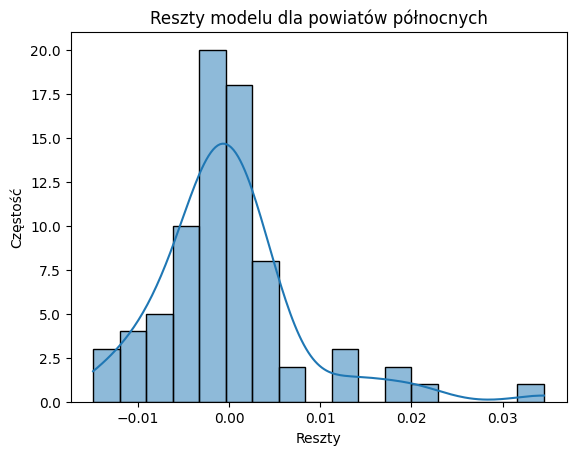

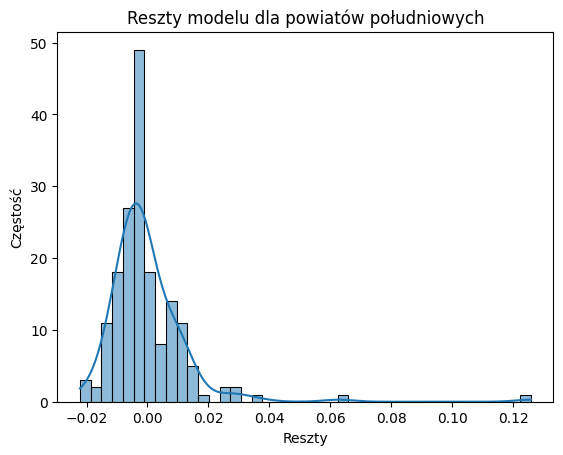

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reszty dla powiatów północnych
residuals_north = model_north.resid

# Histogram dla reszt powiatów północnych
sns.histplot(residuals_north, kde=True)
plt.title("Reszty modelu dla powiatów północnych")
plt.xlabel("Reszty")
plt.ylabel("Częstość")
plt.show()

# Reszty dla powiatów południowych
residuals_south = model_south.resid

# Histogram dla reszt powiatów południowych
sns.histplot(residuals_south, kde=True)
plt.title("Reszty modelu dla powiatów południowych")
plt.xlabel("Reszty")
plt.ylabel("Częstość")
plt.show()
